Importing libraries...
✓ Libraries imported
✓ Feature extraction function defined
Data directory: C:\Users\VIJAY BHUSHAN SINGH\depression_detection_project\data\raw\DAIC-WOZ
Output file: C:\Users\VIJAY BHUSHAN SINGH\depression_detection_project\data\features\video_features.csv

Found 26 sessions

PROCESSING ALL SESSIONS
Extracting video features from separate OpenFace files...



Processing video: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:43<00:00,  1.67s/it]


✓ Processed 26 sessions successfully

DataFrame created:
  Shape: (26, 76)
  Sessions: 26
  Features per session: 75

📋 Feature breakdown:
  Action Unit (AU) features: 60
  Gaze features: 0
  Pose features: 12
  Other features: 3

Sample AU features:
  - AU01_r_mean
  - AU01_r_std
  - AU01_r_max
  - AU02_r_mean
  - AU02_r_std
  - AU02_r_max
  - AU04_r_mean
  - AU04_r_std
  - AU04_r_max
  - AU05_r_mean
  ... and 50 more

First few rows:


,session_id,AU01_r_mean,AU01_r_std,AU01_r_max,AU02_r_mean,AU02_r_std
0,300,0.595489,0.750289,5.00000,0.370124,0.502254
1,301,0.132594,0.366097,5.00000,0.067355,0.223841
2,302,0.848589,1.116890,5.00000,0.685246,0.752853
3,303,0.642368,0.752061,5.00000,0.286291,0.431523
4,304,0.676402,0.816792,4.42097,0.397026,0.519121



✓ Features saved to: C:\Users\VIJAY BHUSHAN SINGH\depression_detection_project\data\features\video_features.csv
  File size: 30.45 KB


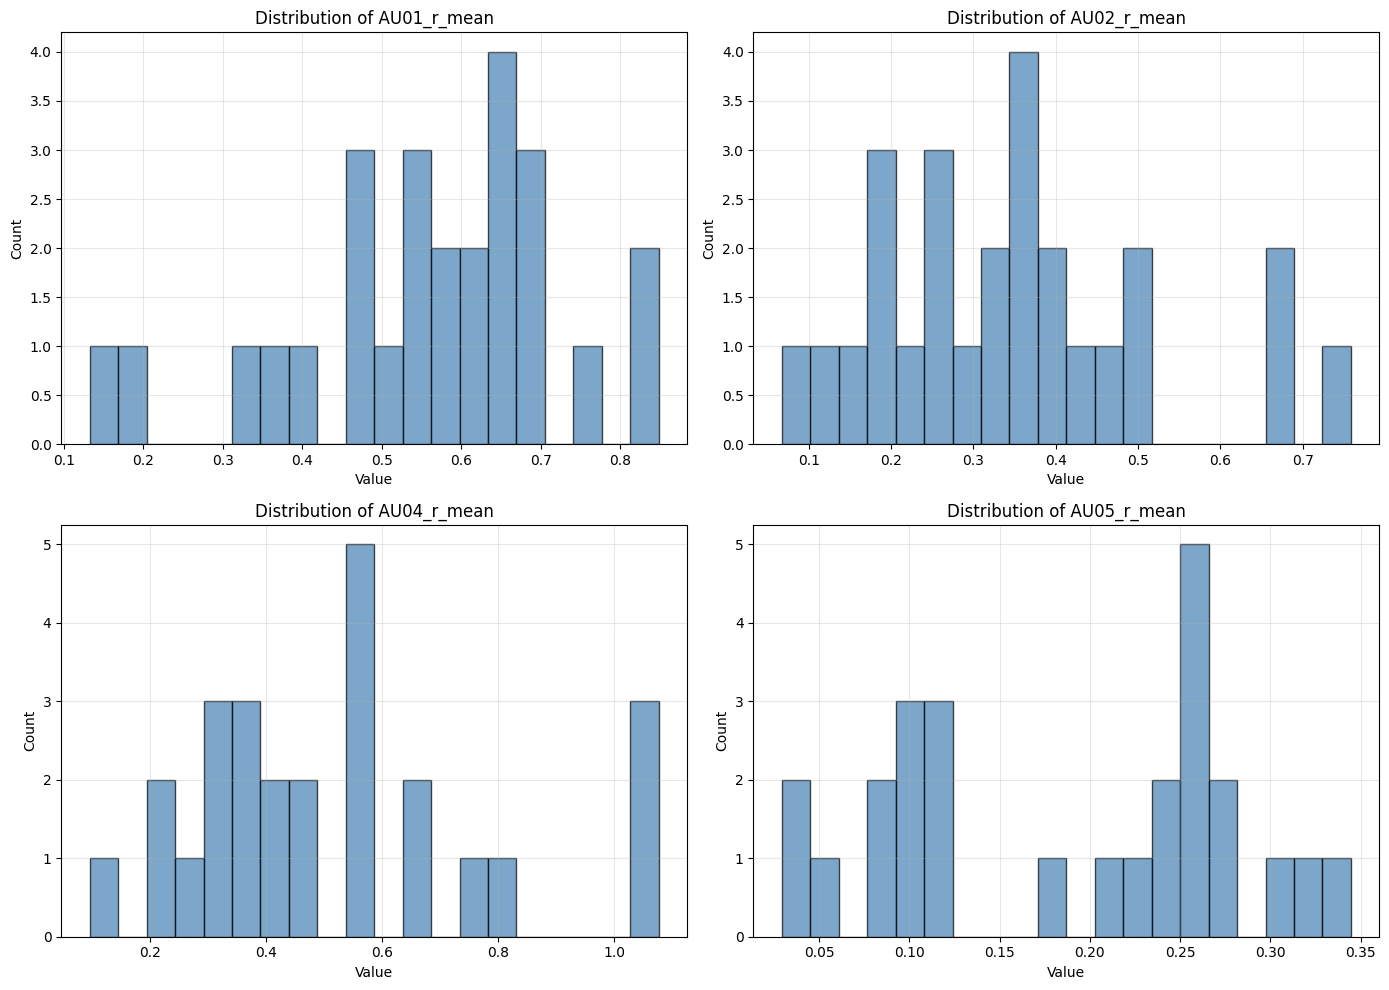


📊 Summary Statistics:
       AU01_r_mean  AU02_r_mean  AU04_r_mean  AU05_r_mean
count    26.000000    26.000000    26.000000    26.000000
mean      0.558619     0.347260     0.514917     0.186734
std       0.174532     0.172914     0.263024     0.095834
min       0.132594     0.067355     0.095834     0.029405
25%       0.471272     0.232416     0.342564     0.101886
50%       0.582179     0.342472     0.459923     0.219818
75%       0.668579     0.419492     0.633607     0.259824
max       0.848589     0.758431     1.077048     0.344525

DATA QUALITY CHECK

✓ No missing values!

📊 Value ranges for key features:
  AU01_r_mean: 0.133 to 0.849
  AU02_r_mean: 0.067 to 0.758
  AU04_r_mean: 0.096 to 1.077

✓ Sessions processed: 26/26

✅ VIDEO FEATURE EXTRACTION COMPLETE!

📊 Final Results:
  ✓ Successfully processed: 26 sessions
  ✓ Total features: 75
  ✓ Action Units: 60
  ✓ Gaze features: 0
  ✓ Pose features: 12
  ✓ Output saved: C:\Users\VIJAY BHUSHAN SINGH\depression_detection_project\d

In [2]:
"""
NOTEBOOK 4: Extract Video Features from OpenFace Files (CORRECT VERSION)

SAVE AS: notebooks/exploratory/07_extract_video_features.ipynb

WHAT THIS DOES:
- Loads OpenFace files: AUs, gaze, and pose (separate files)
- Extracts statistics from each
- Saves to: data/features/video_features.csv

TIME: ~2-5 minutes
"""

# ========== CELL 1: Import Libraries ==========
print("Importing libraries...")

import pandas as pd
import numpy as np
from pathlib import Path
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

print("✓ Libraries imported")

# ========== CELL 2: Define Feature Extraction Function ==========

def extract_video_features(session_dir, session_id):
    """
    Extract features from OpenFace files
    
    Reads from separate files:
    - {session_id}_CLNF_AUs.txt - Action Units
    - {session_id}_CLNF_gaze.txt - Gaze direction  
    - {session_id}_CLNF_pose.txt - Head pose
    """
    features = {}
    
    try:
        # === 1. Load Action Units (AUs) ===
        au_file = session_dir / f'{session_id}_CLNF_AUs.txt'
        
        if au_file.exists():
            # Read AU file (comma-separated, has header with commas in column names)
            au_df = pd.read_csv(au_file, sep=', ', engine='python')
            
            # Get AU columns (columns with AU in name)
            au_cols = [col for col in au_df.columns if 'AU' in col]
            
            # Calculate statistics for each AU
            for au_col in au_cols:
                try:
                    features[f'{au_col}_mean'] = au_df[au_col].mean()
                    features[f'{au_col}_std'] = au_df[au_col].std()
                    features[f'{au_col}_max'] = au_df[au_col].max()
                except:
                    pass
        
        # === 2. Load Gaze ===
        gaze_file = session_dir / f'{session_id}_CLNF_gaze.txt'
        
        if gaze_file.exists():
            gaze_df = pd.read_csv(gaze_file, sep=', ', engine='python')
            
            # Get gaze columns
            gaze_cols = [col for col in gaze_df.columns if 'gaze' in col.lower()]
            
            for gaze_col in gaze_cols:
                try:
                    features[f'{gaze_col}_mean'] = gaze_df[gaze_col].mean()
                    features[f'{gaze_col}_std'] = gaze_df[gaze_col].std()
                except:
                    pass
        
        # === 3. Load Pose ===
        pose_file = session_dir / f'{session_id}_CLNF_pose.txt'
        
        if pose_file.exists():
            pose_df = pd.read_csv(pose_file, sep=', ', engine='python')
            
            # Get pose columns (Tx, Ty, Tz, Rx, Ry, Rz)
            pose_cols = [col for col in pose_df.columns if any(x in col for x in ['Tx', 'Ty', 'Tz', 'Rx', 'Ry', 'Rz'])]
            
            for pose_col in pose_cols:
                try:
                    features[f'{pose_col}_mean'] = pose_df[pose_col].mean()
                    features[f'{pose_col}_std'] = pose_df[pose_col].std()
                except:
                    pass
        
        # === 4. Add metadata ===
        if au_file.exists():
            # Add confidence from AU file
            if 'confidence' in au_df.columns:
                features['confidence_mean'] = au_df['confidence'].mean()
                features['confidence_std'] = au_df['confidence'].std()
            
            # Total frames
            features['total_frames'] = len(au_df)
        
        # Check if we got any features
        if len(features) == 0:
            return None
        
        return features
        
    except Exception as e:
        print(f"  ❌ Error processing session {session_id}: {e}")
        return None

print("✓ Feature extraction function defined")

# ========== CELL 3: Set Paths ==========

DATA_DIR = Path(r'C:\Users\VIJAY BHUSHAN SINGH\depression_detection_project\data\raw\DAIC-WOZ')
OUTPUT_FILE = Path(r'C:\Users\VIJAY BHUSHAN SINGH\depression_detection_project\data\features\video_features.csv')

OUTPUT_FILE.parent.mkdir(parents=True, exist_ok=True)

print(f"Data directory: {DATA_DIR}")
print(f"Output file: {OUTPUT_FILE}")

# ========== CELL 4: Find All Sessions ==========

session_dirs = sorted([d for d in DATA_DIR.iterdir() if d.is_dir() and d.name.endswith('_P')])
session_dirs = [d for d in session_dirs if 300 <= int(d.name.replace('_P', '')) <= 325]

print(f"\nFound {len(session_dirs)} sessions")

# ========== CELL 5: Process All Sessions ==========

print("\n" + "="*60)
print("PROCESSING ALL SESSIONS")
print("="*60)
print("Extracting video features from separate OpenFace files...\n")

all_features = []

for session_dir in tqdm(session_dirs, desc="Processing video"):
    session_id = session_dir.name.replace('_P', '')
    
    # Extract features from all OpenFace files
    features = extract_video_features(session_dir, session_id)
    
    if features:
        features['session_id'] = int(session_id)
        all_features.append(features)

print(f"\n✓ Processed {len(all_features)} sessions successfully")

# ========== CELL 6: Create DataFrame and Save ==========

if len(all_features) > 0:
    df = pd.DataFrame(all_features)
    df = df.sort_values('session_id').reset_index(drop=True)
    
    print(f"\nDataFrame created:")
    print(f"  Shape: {df.shape}")
    print(f"  Sessions: {len(df)}")
    print(f"  Features per session: {len(df.columns) - 1}")
    
    # Show feature breakdown
    au_features = [col for col in df.columns if 'AU' in col]
    gaze_features = [col for col in df.columns if 'gaze' in col.lower()]
    pose_features = [col for col in df.columns if any(x in col for x in ['Tx', 'Ty', 'Tz', 'Rx', 'Ry', 'Rz'])]
    
    print(f"\n📋 Feature breakdown:")
    print(f"  Action Unit (AU) features: {len(au_features)}")
    print(f"  Gaze features: {len(gaze_features)}")
    print(f"  Pose features: {len(pose_features)}")
    print(f"  Other features: {len(df.columns) - len(au_features) - len(gaze_features) - len(pose_features) - 1}")
    
    # Show sample AU features
    print(f"\nSample AU features:")
    for col in au_features[:10]:
        print(f"  - {col}")
    if len(au_features) > 10:
        print(f"  ... and {len(au_features) - 10} more")
    
    print("\nFirst few rows:")
    display(df[['session_id'] + au_features[:5]].head())
    
    # Save
    df.to_csv(OUTPUT_FILE, index=False)
    
    print(f"\n✓ Features saved to: {OUTPUT_FILE}")
    print(f"  File size: {OUTPUT_FILE.stat().st_size / 1024:.2f} KB")
    
else:
    print("\n❌ No features extracted!")

# ========== CELL 7: Visualize ==========

if len(all_features) > 0:
    import matplotlib.pyplot as plt
    
    # Plot some AU features
    au_cols = [col for col in df.columns if 'AU' in col and 'mean' in col][:4]
    
    if len(au_cols) >= 4:
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        axes = axes.flatten()
        
        for i, au_col in enumerate(au_cols):
            axes[i].hist(df[au_col], bins=20, edgecolor='black', alpha=0.7, color='steelblue')
            axes[i].set_title(f'Distribution of {au_col}')
            axes[i].set_xlabel('Value')
            axes[i].set_ylabel('Count')
            axes[i].grid(alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    else:
        print("Not enough AU features for visualization")
    
    # Summary statistics
    print("\n📊 Summary Statistics:")
    print(df[au_cols[:4]].describe())

# ========== CELL 8: Verify Data Quality ==========

if len(all_features) > 0:
    print("\n" + "="*60)
    print("DATA QUALITY CHECK")
    print("="*60)
    
    # Check for missing values
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    
    if len(missing) > 0:
        print(f"\n⚠ Missing values found in {len(missing)} columns:")
        print(missing.head(10))
    else:
        print("\n✓ No missing values!")
    
    # Check value ranges
    print(f"\n📊 Value ranges for key features:")
    sample_features = [col for col in df.columns if 'AU' in col and 'mean' in col][:3]
    for feat in sample_features:
        print(f"  {feat}: {df[feat].min():.3f} to {df[feat].max():.3f}")
    
    # Check if all sessions processed
    print(f"\n✓ Sessions processed: {len(df)}/26")
    if len(df) < 26:
        missing_sessions = set(range(300, 326)) - set(df['session_id'])
        print(f"  Missing sessions: {sorted(missing_sessions)}")

# ========== CELL 9: Summary ==========

print("\n" + "="*60)
if len(all_features) > 0:
    print("✅ VIDEO FEATURE EXTRACTION COMPLETE!")
    print("="*60)
    print(f"\n📊 Final Results:")
    print(f"  ✓ Successfully processed: {len(df)} sessions")
    print(f"  ✓ Total features: {len(df.columns) - 1}")
    print(f"  ✓ Action Units: {len([col for col in df.columns if 'AU' in col])}")
    print(f"  ✓ Gaze features: {len([col for col in df.columns if 'gaze' in col.lower()])}")
    print(f"  ✓ Pose features: {len([col for col in df.columns if any(x in col for x in ['Tx', 'Ty', 'Tz', 'Rx', 'Ry', 'Rz'])])}")
    print(f"  ✓ Output saved: {OUTPUT_FILE}")
    
    print(f"\n🎯 Next Step:")
    print(f"  Run Notebook 5 to merge audio + text + video features!")
    
else:
    print("❌ VIDEO FEATURE EXTRACTION FAILED")
    print("="*60)
    print("\n⚠ No features were extracted.")

print("="*60)